## UGCA Assignment 4 - Instagram

**Is a Picture Worth a Thousand Words?**

On Instagram, choose the National Geographic (natgeo) page (do not use hashtags). Write a scraper or use the Web Scraper to extract 

1. image URLs (do not extract video URLs, it may end up costing you a lot of money to run analytics on video), 
2. post caption (the text description of a post), 
3. likes
4. comments

You don’t need actual comments for this assignment. Scrape 250-500 image posts. 

In [1]:
# Selenium is used to handle the javascript on a website

#Importing libraries
import pandas as pd
import os     #to manipulate files
import numpy as np
import io
import sys

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
# Import webdriver from selenium
import matplotlib.pyplot as plt

#Scikit tools
import sklearn.preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from scipy.misc import imread
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier

import statsmodels.api as sm

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline






from selenium import webdriver
import io
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import urllib
import os
from collections import OrderedDict
from operator import itemgetter    
import random
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

import requests
from requests import get
from urllib.parse import urljoin
from os import path, getcwd
from bs4 import BeautifulSoup as soup
from requests import get
import random
from math import log
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

import pickle 
#import mglearn
import time


from nltk.tokenize import TweetTokenizer # doesn't split at apostrophes
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

## To scrape Instagram we used a tool called 'Octoparse'

##### This tool works in a similar fasion like Chrome webscrapper extension, but is used mainly for Instagram

In [3]:
data = pd.read_csv('NationalGeographic1.csv',encoding = "ISO-8859-1")
data

,caption,likes,URL,comments
0,Photo by @stephenwilkes | The water creates a ...,"55,694 likes",https://scontent-dfw5-2.cdninstagram.com/vp/53...,196
1,Photos by @richardbarnes | After completing a ...,"102,213 likes",https://scontent-dfw5-2.cdninstagram.com/vp/68...,418
2,Photos by @laurentballesta | How to meet a liv...,"348,374 likes",https://scontent-dfw5-2.cdninstagram.com/vp/2b...,2163
3,Photo by @CristinaMittermeier | I met this Lis...,"257,808 likes",https://scontent-dfw5-2.cdninstagram.com/vp/8a...,614
4,Photo by David Chancellor @chancellordavid | G...,"340,355 likes",https://scontent-dfw5-2.cdninstagram.com/vp/83...,893
5,Photo by @simonnorfolkstudio | Adanac Military...,"166,528 likes",https://scontent-dfw5-2.cdninstagram.com/vp/5c...,340
6,"Photo by @salvarezphoto | Chomolungma, as it i...","292,730 likes",https://scontent-dfw5-2.cdninstagram.com/vp/46...,554
7,Photo by @melissafarlow | Morning fog lifts an...,"303,821 likes",https://scontent-dfw5-2.cdninstagram.com/vp/ec...,559
8,Photo by @amivitale | Ntipiyon Nonguta and her...,"208,926 likes",https://scontent-dfw5-2.cdninstagram.com/vp/81...,715
9,Photos by @ciriljazbec | Bhutan is one of the ...,"434,399 likes",https://scontent-dfw5-2.cdninstagram.com/vp/0b...,1403


In [4]:

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/anuja/Downloads/UGCA_Assignment4/UGCA project-ce6f01024b7b.json"
print('Credendtials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))

Credendtials from environ: /Users/anuja/Downloads/UGCA_Assignment4/UGCA project-ce6f01024b7b.json


#### This part of the code connects with Google Vision API and runs in a loop to get the labels for all the images

##### Do not run this part of the code Again.. !!

In [ ]:
def getlabelsforLocalImage(path):
    labels_list=[]
    # Instantiates a client
    client = vision.ImageAnnotatorClient()

    # The name of the image file to annotate
    file_name = os.path.join(
        os.path.dirname('__file__'),
        path)


    # Loads the image into memory
    with io.open(file_name, 'rb') as image_file:
        content = image_file.read()

    image = types.Image(content=content)

    # Performs label detection on the image file
    response = client.label_detection(image=image)
    labels = response.label_annotations

    ##print('Labels:')
    for label in labels:
        labels_list.append(label)
    ##print(label.description)
    
    return labels_list

In [ ]:
def getlabelsforRemoteImage(uri):
    """Detects labels in the file located in Google Cloud Storage or on the
    Web."""
    labels_list=[]
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    response = client.label_detection(image=image)
    labels = response.label_annotations
    
    for label in labels:
        labels_list.append(label.description)
    return labels_list

In [ ]:
def getLabels(df_links):
    link_labels=[]
    for x in df_links:
        label_names=[]
        label_names= getlabelsforRemoteImage(x)
        link_labels.append(label_names)
        
    return link_labels

In [ ]:
def insertLabelsInDataFrame(start,end,link_labels,originalDataFrame):
    originalDataFrame = originalDataFrame.astype('object') 
    counter=0
    for x in range(start,end):
        originalDataFrame['labels'][x] = link_labels[counter]
        print(x)
        counter=counter+1
    return originalDataFrame

In [ ]:
import sys

start=360
end=1+360
counter=1

data_temp1=data.loc[360:367,:]
data_temp1['labels']=""

while end<=367:
    link_labels=[]
    data_temp=data_temp1.loc[start:end,:]
    
    df_links=data_temp['URL'].tolist()
    link_labels = getLabels(df_links)
    data_temp2 =  insertLabelsInDataFrame(start,end,link_labels,data_temp1)
    
    data_temp1=data_temp2
    start=end
    end=end+1
    counter=counter+1
    

In [ ]:
part9=data_temp1

In [ ]:
part9.to_csv('part9.csv', sep=',',encoding="ISO-8859-1")

#### Creating the csv with the labels attached to the dataframe

In [5]:
labels_df = pd.read_csv('FinalLabels.csv',encoding = "ISO-8859-1")
labels_df = labels_df.drop(columns=['Unnamed: 0'])

In [6]:
labels_df

,caption,likes,URL,comments,labels
0,Photo by @stephenwilkes | The water creates a ...,"55,694 likes",https://scontent-dfw5-2.cdninstagram.com/vp/53...,196,"['blue', 'sky', 'water', 'reflection', 'atmosp..."
1,Photos by @richardbarnes | After completing a ...,"102,213 likes",https://scontent-dfw5-2.cdninstagram.com/vp/68...,418,"['tree', 'wall', 'structure', 'arch', 'mural',..."
2,Photos by @laurentballesta | How to meet a liv...,"348,374 likes",https://scontent-dfw5-2.cdninstagram.com/vp/2b...,2163,"['blue', 'water', 'sea', 'underwater', 'ocean'..."
3,Photo by @CristinaMittermeier | I met this Lis...,"257,808 likes",https://scontent-dfw5-2.cdninstagram.com/vp/8a...,614,"['plant', 'tree', 'organism', 'jungle', 'branc..."
4,Photo by David Chancellor @chancellordavid | G...,"340,355 likes",https://scontent-dfw5-2.cdninstagram.com/vp/83...,893,"['beak', 'fauna', 'bird of prey', 'eagle', 'bi..."
5,Photo by @simonnorfolkstudio | Adanac Military...,"166,528 likes",https://scontent-dfw5-2.cdninstagram.com/vp/5c...,340,"['sky', 'landmark', 'memorial', 'historic site..."
6,"Photo by @salvarezphoto | Chomolungma, as it i...","292,730 likes",https://scontent-dfw5-2.cdninstagram.com/vp/46...,554,"['black and white', 'mountainous landforms', '..."
7,Photo by @melissafarlow | Morning fog lifts an...,"303,821 likes",https://scontent-dfw5-2.cdninstagram.com/vp/ec...,559,"['reflection', 'nature', 'water', 'loch', 'lak..."
8,Photo by @amivitale | Ntipiyon Nonguta and her...,"208,926 likes",https://scontent-dfw5-2.cdninstagram.com/vp/81...,715,"['people', 'vertebrate', 'plant', 'tree', 'com..."
9,Photos by @ciriljazbec | Bhutan is one of the ...,"434,399 likes",https://scontent-dfw5-2.cdninstagram.com/vp/0b...,1403,"['tree', 'vegetation', 'forest', 'woody plant'..."


## Summary till this point


Till this point we did the following:
* Scrapped Instagram using Octoparse tool
* Cleaning the data to remove the videos (that are included alongwith photos, removing Null values from the data)
* Made API calls to Google Vision using Client library

## Task A

Create a metric for engagement by using a weighted sum of # likes and # comments. 
However, first normalize # likes and # comments such that they both have values between 0 and 1. 
You can scale the # likes by dividing by the maximum # likes (for a post) in your data and do the same for # comments, so that # likes and comments will be in the range [0,1]. Now create an engagement score = .4*# likes (normalized) + .6*# comments (normalized). Define High (1) and Low (0) engagement based on whether the engagement score is above or below the median value.  

In [7]:
df = pd.read_csv('FinalLabels.csv',encoding='ISO-8859-1')
df

,Unnamed: 0,caption,likes,URL,comments,labels
0,0,Photo by @stephenwilkes | The water creates a ...,"55,694 likes",https://scontent-dfw5-2.cdninstagram.com/vp/53...,196,"['blue', 'sky', 'water', 'reflection', 'atmosp..."
1,1,Photos by @richardbarnes | After completing a ...,"102,213 likes",https://scontent-dfw5-2.cdninstagram.com/vp/68...,418,"['tree', 'wall', 'structure', 'arch', 'mural',..."
2,2,Photos by @laurentballesta | How to meet a liv...,"348,374 likes",https://scontent-dfw5-2.cdninstagram.com/vp/2b...,2163,"['blue', 'water', 'sea', 'underwater', 'ocean'..."
3,3,Photo by @CristinaMittermeier | I met this Lis...,"257,808 likes",https://scontent-dfw5-2.cdninstagram.com/vp/8a...,614,"['plant', 'tree', 'organism', 'jungle', 'branc..."
4,4,Photo by David Chancellor @chancellordavid | G...,"340,355 likes",https://scontent-dfw5-2.cdninstagram.com/vp/83...,893,"['beak', 'fauna', 'bird of prey', 'eagle', 'bi..."
5,5,Photo by @simonnorfolkstudio | Adanac Military...,"166,528 likes",https://scontent-dfw5-2.cdninstagram.com/vp/5c...,340,"['sky', 'landmark', 'memorial', 'historic site..."
6,6,"Photo by @salvarezphoto | Chomolungma, as it i...","292,730 likes",https://scontent-dfw5-2.cdninstagram.com/vp/46...,554,"['black and white', 'mountainous landforms', '..."
7,7,Photo by @melissafarlow | Morning fog lifts an...,"303,821 likes",https://scontent-dfw5-2.cdninstagram.com/vp/ec...,559,"['reflection', 'nature', 'water', 'loch', 'lak..."
8,8,Photo by @amivitale | Ntipiyon Nonguta and her...,"208,926 likes",https://scontent-dfw5-2.cdninstagram.com/vp/81...,715,"['people', 'vertebrate', 'plant', 'tree', 'com..."
9,9,Photos by @ciriljazbec | Bhutan is one of the ...,"434,399 likes",https://scontent-dfw5-2.cdninstagram.com/vp/0b...,1403,"['tree', 'vegetation', 'forest', 'woody plant'..."


In [8]:
df.likes=df.likes.str.strip('likes').str.replace(',','').fillna(0).astype(int)

In [9]:
df.likes.max()

1540094

In [10]:
df.likes_scaled=df.likes/df.likes.max()
df.likes_scaled.head()

/Users/anuja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


0    0.036163
1    0.066368
2    0.226203
3    0.167398
4    0.220996
Name: likes, dtype: float64

In [11]:
df.comments=df.comments.fillna(0).astype(int)
df.comments.head()

0     196
1     418
2    2163
3     614
4     893
Name: comments, dtype: int64

In [12]:
df.comments.max()

104620

In [13]:
df.comments_scaled = df.comments/df.comments.max()

/Users/anuja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [14]:
df.comments_scaled.head()

0    0.001873
1    0.003995
2    0.020675
3    0.005869
4    0.008536
Name: comments, dtype: float64

In [15]:
eng_score = (0.4*df.likes_scaled)+(0.6*df.comments_scaled)
eng_score.head()

0    0.015589
1    0.028944
2    0.102886
3    0.070480
4    0.093520
dtype: float64

In [16]:
type(eng_score)

pandas.core.series.Series

In [17]:
eng_score = eng_score.to_frame()


In [18]:
eng_score = eng_score.rename(columns= {0: 'eng_score'})
eng_score.index.name = 'index'

In [19]:
df_final = pd.concat([df, eng_score], axis=1)

In [20]:
df_final

,Unnamed: 0,caption,likes,URL,comments,labels,eng_score
0,0,Photo by @stephenwilkes | The water creates a ...,55694,https://scontent-dfw5-2.cdninstagram.com/vp/53...,196,"['blue', 'sky', 'water', 'reflection', 'atmosp...",0.015589
1,1,Photos by @richardbarnes | After completing a ...,102213,https://scontent-dfw5-2.cdninstagram.com/vp/68...,418,"['tree', 'wall', 'structure', 'arch', 'mural',...",0.028944
2,2,Photos by @laurentballesta | How to meet a liv...,348374,https://scontent-dfw5-2.cdninstagram.com/vp/2b...,2163,"['blue', 'water', 'sea', 'underwater', 'ocean'...",0.102886
3,3,Photo by @CristinaMittermeier | I met this Lis...,257808,https://scontent-dfw5-2.cdninstagram.com/vp/8a...,614,"['plant', 'tree', 'organism', 'jungle', 'branc...",0.070480
4,4,Photo by David Chancellor @chancellordavid | G...,340355,https://scontent-dfw5-2.cdninstagram.com/vp/83...,893,"['beak', 'fauna', 'bird of prey', 'eagle', 'bi...",0.093520
5,5,Photo by @simonnorfolkstudio | Adanac Military...,166528,https://scontent-dfw5-2.cdninstagram.com/vp/5c...,340,"['sky', 'landmark', 'memorial', 'historic site...",0.045201
6,6,"Photo by @salvarezphoto | Chomolungma, as it i...",292730,https://scontent-dfw5-2.cdninstagram.com/vp/46...,554,"['black and white', 'mountainous landforms', '...",0.079206
7,7,Photo by @melissafarlow | Morning fog lifts an...,303821,https://scontent-dfw5-2.cdninstagram.com/vp/ec...,559,"['reflection', 'nature', 'water', 'loch', 'lak...",0.082116
8,8,Photo by @amivitale | Ntipiyon Nonguta and her...,208926,https://scontent-dfw5-2.cdninstagram.com/vp/81...,715,"['people', 'vertebrate', 'plant', 'tree', 'com...",0.058364
9,9,Photos by @ciriljazbec | Bhutan is one of the ...,434399,https://scontent-dfw5-2.cdninstagram.com/vp/0b...,1403,"['tree', 'vegetation', 'forest', 'woody plant'...",0.120870


In [21]:
df_final['eng_score'].median()

0.08782892285612827

In [22]:
df_final['engagement_score'] = 'High'

In [23]:
df_final['engagement_score'][(df_final['eng_score']) < (df_final['eng_score'].median())] = 'Low'

/Users/anuja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_final = df_final.drop(columns=['Unnamed: 0'],axis=1)
df_final

,caption,likes,URL,comments,labels,eng_score,engagement_score
0,Photo by @stephenwilkes | The water creates a ...,55694,https://scontent-dfw5-2.cdninstagram.com/vp/53...,196,"['blue', 'sky', 'water', 'reflection', 'atmosp...",0.015589,Low
1,Photos by @richardbarnes | After completing a ...,102213,https://scontent-dfw5-2.cdninstagram.com/vp/68...,418,"['tree', 'wall', 'structure', 'arch', 'mural',...",0.028944,Low
2,Photos by @laurentballesta | How to meet a liv...,348374,https://scontent-dfw5-2.cdninstagram.com/vp/2b...,2163,"['blue', 'water', 'sea', 'underwater', 'ocean'...",0.102886,High
3,Photo by @CristinaMittermeier | I met this Lis...,257808,https://scontent-dfw5-2.cdninstagram.com/vp/8a...,614,"['plant', 'tree', 'organism', 'jungle', 'branc...",0.070480,Low
4,Photo by David Chancellor @chancellordavid | G...,340355,https://scontent-dfw5-2.cdninstagram.com/vp/83...,893,"['beak', 'fauna', 'bird of prey', 'eagle', 'bi...",0.093520,High
5,Photo by @simonnorfolkstudio | Adanac Military...,166528,https://scontent-dfw5-2.cdninstagram.com/vp/5c...,340,"['sky', 'landmark', 'memorial', 'historic site...",0.045201,Low
6,"Photo by @salvarezphoto | Chomolungma, as it i...",292730,https://scontent-dfw5-2.cdninstagram.com/vp/46...,554,"['black and white', 'mountainous landforms', '...",0.079206,Low
7,Photo by @melissafarlow | Morning fog lifts an...,303821,https://scontent-dfw5-2.cdninstagram.com/vp/ec...,559,"['reflection', 'nature', 'water', 'loch', 'lak...",0.082116,Low
8,Photo by @amivitale | Ntipiyon Nonguta and her...,208926,https://scontent-dfw5-2.cdninstagram.com/vp/81...,715,"['people', 'vertebrate', 'plant', 'tree', 'com...",0.058364,Low
9,Photos by @ciriljazbec | Bhutan is one of the ...,434399,https://scontent-dfw5-2.cdninstagram.com/vp/0b...,1403,"['tree', 'vegetation', 'forest', 'woody plant'...",0.120870,High


In [92]:
df_final=df_final.sort_values(by=['eng_score'], ascending=False)
df_final

,likes,comments,labels,eng_score,engagement_score
67,1540094,104620,"['rhinoceros', 'mammal', 'wildlife', 'terrestr...",1.000000,High
122,1333096,95187,"['rhinoceros', 'terrestrial animal', 'fauna', ...",0.892139,High
77,1195746,6557,"['mountain goat', 'snow', 'arctic', 'sky', 'fr...",0.348169,High
133,923208,16567,"['three toed sloth', 'mammal', 'fauna', 'sloth...",0.334792,High
33,1176651,4762,"['wood', 'hardwood', 'wood stain']",0.332915,High
219,1084047,4793,"['elephants and mammoths', 'elephant', 'mammal...",0.309042,High
136,1047405,5301,"['wildlife', 'dog like mammal', 'dog breed gro...",0.302438,High
78,755151,15320,"['fauna', 'mammal', 'fur', 'macaque', 'old wor...",0.283992,High
183,958748,3640,"['elephants and mammoths', 'elephant', 'mammal...",0.269886,High
239,883014,6678,"['wildlife', 'mammal', 'fauna', 'reflection', ...",0.267639,High


## Summary till this point


To complete Task A, we did the following:
* Normalizing likes and Comments (by dividing them by their respective maximum)
* Calculating Engagement score using weighetd likes and comments
* Defining Engagement score as high or low based on the median value

## Task B

Run a logistic regression with Engagement (binary) as the dependent variable, and the image labels as independent variables. What is the accuracy (show the confusion matrix)?

In [25]:
df_caption = (df_final['caption'].str.split('|', expand=True)
            .rename(columns=lambda x: f"caption_{x+1}"))
df_caption.head()

,caption_1,caption_2,caption_3
0,Photo by @stephenwilkes,The water creates a surreal color landscape a...,None
1,Photos by @richardbarnes,After completing a photographic assignment at...,None
2,Photos by @laurentballesta,How to meet a living legend? First learn ever...,None
3,Photo by @CristinaMittermeier,I met this Lisu man as he gathered gifts of t...,None
4,Photo by David Chancellor @chancellordavid,"Golden eagle chick, Cairngorm National Park, ...",None


In [26]:
df_final=df_final.drop(columns=['caption','URL'],axis=1)


In [27]:
df_modellog = df_final.join(df_caption)
df_modellog

,likes,comments,labels,eng_score,engagement_score,caption_1,caption_2,caption_3
0,55694,196,"['blue', 'sky', 'water', 'reflection', 'atmosp...",0.015589,Low,Photo by @stephenwilkes,The water creates a surreal color landscape a...,None
1,102213,418,"['tree', 'wall', 'structure', 'arch', 'mural',...",0.028944,Low,Photos by @richardbarnes,After completing a photographic assignment at...,None
2,348374,2163,"['blue', 'water', 'sea', 'underwater', 'ocean'...",0.102886,High,Photos by @laurentballesta,How to meet a living legend? First learn ever...,None
3,257808,614,"['plant', 'tree', 'organism', 'jungle', 'branc...",0.070480,Low,Photo by @CristinaMittermeier,I met this Lisu man as he gathered gifts of t...,None
4,340355,893,"['beak', 'fauna', 'bird of prey', 'eagle', 'bi...",0.093520,High,Photo by David Chancellor @chancellordavid,"Golden eagle chick, Cairngorm National Park, ...",None
5,166528,340,"['sky', 'landmark', 'memorial', 'historic site...",0.045201,Low,Photo by @simonnorfolkstudio,Adanac Military Cemetery is a burial ground f...,None
6,292730,554,"['black and white', 'mountainous landforms', '...",0.079206,Low,Photo by @salvarezphoto,"Chomolungma, as it is known in Tibet, rises l...",None
7,303821,559,"['reflection', 'nature', 'water', 'loch', 'lak...",0.082116,Low,Photo by @melissafarlow,Morning fog lifts and sun and shadows paint K...,None
8,208926,715,"['people', 'vertebrate', 'plant', 'tree', 'com...",0.058364,Low,Photo by @amivitale,"Ntipiyon Nonguta and her son Bernard, one, re...",None
9,434399,1403,"['tree', 'vegetation', 'forest', 'woody plant'...",0.120870,High,Photos by @ciriljazbec,Bhutan is one of the world's remaining biodiv...,None


In [28]:
cols = df_modellog.columns.tolist()
cols

['likes',
 'comments',
 'labels',
 'eng_score',
 'engagement_score',
 'caption_1',
 'caption_2',
 'caption_3']

In [29]:
cols.insert(0, cols.pop(cols.index('caption_1')))


In [30]:
cols.insert(1, cols.pop(cols.index('caption_2')))
cols.insert(2, cols.pop(cols.index('caption_3')))
cols

['caption_1',
 'caption_2',
 'caption_3',
 'likes',
 'comments',
 'labels',
 'eng_score',
 'engagement_score']

In [31]:
df_modellog = df_modellog.reindex(columns= cols)

In [32]:
df_log= df_modellog.drop(columns=['caption_3'],axis =1)

In [33]:
df_log.rename(columns={'caption_1': 'User_Id','caption_2': 'Post_Description'}, inplace=True)
df_log

,User_Id,Post_Description,likes,comments,labels,eng_score,engagement_score
0,Photo by @stephenwilkes,The water creates a surreal color landscape a...,55694,196,"['blue', 'sky', 'water', 'reflection', 'atmosp...",0.015589,Low
1,Photos by @richardbarnes,After completing a photographic assignment at...,102213,418,"['tree', 'wall', 'structure', 'arch', 'mural',...",0.028944,Low
2,Photos by @laurentballesta,How to meet a living legend? First learn ever...,348374,2163,"['blue', 'water', 'sea', 'underwater', 'ocean'...",0.102886,High
3,Photo by @CristinaMittermeier,I met this Lisu man as he gathered gifts of t...,257808,614,"['plant', 'tree', 'organism', 'jungle', 'branc...",0.070480,Low
4,Photo by David Chancellor @chancellordavid,"Golden eagle chick, Cairngorm National Park, ...",340355,893,"['beak', 'fauna', 'bird of prey', 'eagle', 'bi...",0.093520,High
5,Photo by @simonnorfolkstudio,Adanac Military Cemetery is a burial ground f...,166528,340,"['sky', 'landmark', 'memorial', 'historic site...",0.045201,Low
6,Photo by @salvarezphoto,"Chomolungma, as it is known in Tibet, rises l...",292730,554,"['black and white', 'mountainous landforms', '...",0.079206,Low
7,Photo by @melissafarlow,Morning fog lifts and sun and shadows paint K...,303821,559,"['reflection', 'nature', 'water', 'loch', 'lak...",0.082116,Low
8,Photo by @amivitale,"Ntipiyon Nonguta and her son Bernard, one, re...",208926,715,"['people', 'vertebrate', 'plant', 'tree', 'com...",0.058364,Low
9,Photos by @ciriljazbec,Bhutan is one of the world's remaining biodiv...,434399,1403,"['tree', 'vegetation', 'forest', 'woody plant'...",0.120870,High


In [34]:
#df_log.to_csv('final_csv.csv', sep=',',encoding='utf-8')

In [36]:
df_logistic = pd.read_csv('final_csv.csv')
df_logistic = df_logistic.drop(columns=['Unnamed: 0'],axis=1)

#df_logistic.sort()

In [37]:
df_labels=df_logistic
df_labels['new_labels']=''
df_labels

,User_Id,Post_Description,likes,comments,labels,eng_score,engagement_score,new_labels
0,Photo by @stephenwilkes,The water creates a surreal color landscape a...,55694,196,"['blue', 'sky', 'water', 'reflection', 'atmosp...",0.015589,Low,
1,Photos by @richardbarnes,After completing a photographic assignment at...,102213,418,"['tree', 'wall', 'structure', 'arch', 'mural',...",0.028944,Low,
2,Photos by @laurentballesta,How to meet a living legend? First learn ever...,348374,2163,"['blue', 'water', 'sea', 'underwater', 'ocean'...",0.102886,High,
3,Photo by @CristinaMittermeier,I met this Lisu man as he gathered gifts of t...,257808,614,"['plant', 'tree', 'organism', 'jungle', 'branc...",0.070480,Low,
4,Photo by David Chancellor @chancellordavid,"Golden eagle chick, Cairngorm National Park, ...",340355,893,"['beak', 'fauna', 'bird of prey', 'eagle', 'bi...",0.093520,High,
5,Photo by @simonnorfolkstudio,Adanac Military Cemetery is a burial ground f...,166528,340,"['sky', 'landmark', 'memorial', 'historic site...",0.045201,Low,
6,Photo by @salvarezphoto,"Chomolungma, as it is known in Tibet, rises l...",292730,554,"['black and white', 'mountainous landforms', '...",0.079206,Low,
7,Photo by @melissafarlow,Morning fog lifts and sun and shadows paint K...,303821,559,"['reflection', 'nature', 'water', 'loch', 'lak...",0.082116,Low,
8,Photo by @amivitale,"Ntipiyon Nonguta and her son Bernard, one, re...",208926,715,"['people', 'vertebrate', 'plant', 'tree', 'com...",0.058364,Low,
9,Photos by @ciriljazbec,Bhutan is one of the world's remaining biodiv...,434399,1403,"['tree', 'vegetation', 'forest', 'woody plant'...",0.120870,High,


In [38]:
df_labels['new_labels']= df_labels['labels'].str.replace(r"[\]\[\',]", '')

df_labels

,User_Id,Post_Description,likes,comments,labels,eng_score,engagement_score,new_labels
0,Photo by @stephenwilkes,The water creates a surreal color landscape a...,55694,196,"['blue', 'sky', 'water', 'reflection', 'atmosp...",0.015589,Low,blue sky water reflection atmosphere daytime l...
1,Photos by @richardbarnes,After completing a photographic assignment at...,102213,418,"['tree', 'wall', 'structure', 'arch', 'mural',...",0.028944,Low,tree wall structure arch mural painting home s...
2,Photos by @laurentballesta,How to meet a living legend? First learn ever...,348374,2163,"['blue', 'water', 'sea', 'underwater', 'ocean'...",0.102886,High,blue water sea underwater ocean sky marine bio...
3,Photo by @CristinaMittermeier,I met this Lisu man as he gathered gifts of t...,257808,614,"['plant', 'tree', 'organism', 'jungle', 'branc...",0.070480,Low,plant tree organism jungle branch forest
4,Photo by David Chancellor @chancellordavid,"Golden eagle chick, Cairngorm National Park, ...",340355,893,"['beak', 'fauna', 'bird of prey', 'eagle', 'bi...",0.093520,High,beak fauna bird of prey eagle bird organism ha...
5,Photo by @simonnorfolkstudio,Adanac Military Cemetery is a burial ground f...,166528,340,"['sky', 'landmark', 'memorial', 'historic site...",0.045201,Low,sky landmark memorial historic site architectu...
6,Photo by @salvarezphoto,"Chomolungma, as it is known in Tibet, rises l...",292730,554,"['black and white', 'mountainous landforms', '...",0.079206,Low,black and white mountainous landforms mountain...
7,Photo by @melissafarlow,Morning fog lifts and sun and shadows paint K...,303821,559,"['reflection', 'nature', 'water', 'loch', 'lak...",0.082116,Low,reflection nature water loch lake sky wilderne...
8,Photo by @amivitale,"Ntipiyon Nonguta and her son Bernard, one, re...",208926,715,"['people', 'vertebrate', 'plant', 'tree', 'com...",0.058364,Low,people vertebrate plant tree community crowd t...
9,Photos by @ciriljazbec,Bhutan is one of the world's remaining biodiv...,434399,1403,"['tree', 'vegetation', 'forest', 'woody plant'...",0.120870,High,tree vegetation forest woody plant woodland ec...


In [39]:
df_logistic = df_labels

In [40]:
df_logistic['Post_Description'] =df_logistic['Post_Description'].str.lower()

In [41]:
final_doc = df_logistic['Post_Description']

all_documents = tuple(final_doc)
all_documents

(' the water creates a surreal color landscape as the sun sets in robson bight.to see more photos from my travels near and far, visit me @stephenwilkes.#daytonight #stephenwilkes #abstraction #water #nature #canada #colorful',
 ' after completing a photographic assignment at the california academy of sciences i was walking out of the african hall when i noticed a painter on a scaffold repainting a scene in a diorama that had been damaged by smoke from a fire that had recently occurred. i was struck by the strangeness of the scene of this beautiful surreal savannah with giraffe, wildebeest, etc. wrapped in protective plastic, juxtaposed with the painter amidst the tools of his trade. i received permission to return to photograph and this chance encounter led me on to the path to what would become my obsession with photographing dioramas throughout the world in states of removal, restoration and often, sadly, destruction. there is a strange, some would say disturbing, irony, in going out

In [42]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

# Transforms the data into a bag of words
count_train = count_vec.fit(all_documents)
bag_of_words = count_vec.transform(all_documents)

# Print the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))
print("\nEvery 3rd feature:\n{}".format(count_vec.get_feature_names()[::3]))

Every feature:
['00', '000', '01', '029', '10', '100', '1000', '100m', '100th', '11', '12', '120', '120m', '1250', '1250ce', '13', '130', '130m', '1357', '13th', '14', '15', '150', '1500', '150mi', '1517', '1521', '1566', '15th', '16', '16023', '1649', '16th', '17', '170', '1700s', '1787', '1789', '18', '180', '1800s', '184', '1880', '1880s', '19', '1900', '1904', '1908', '1918', '1920s', '1925', '1940s', '1947', '1950s', '1953', '1960', '1963', '1964', '1965', '1968', '1969', '1970', '1970s', '1979', '1980s', '1981', '1987', '1990', '1990s', '1992', '1994', '1996', '19th', '1st', '20', '200', '2000', '2001', '2002', '2004during', '2005', '2006', '2007', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2030', '209', '20th', '21', '212m', '21st', '22', '23', '24', '240km', '240mi', '25', '250', '2500', '257ft', '25th', '26', '262', '27', '29', '29th', '2nd', '30', '300', '3000', '3000ft', '31', '3186', '32', '350', '36', '360', '360ft', '3

In [43]:
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(all_documents)
txt_transformed = txt_fitted.transform(all_documents)
print ("The text: ", all_documents)

The text:  (' the water creates a surreal color landscape as the sun sets in robson bight.to see more photos from my travels near and far, visit me @stephenwilkes.#daytonight #stephenwilkes #abstraction #water #nature #canada #colorful', ' after completing a photographic assignment at the california academy of sciences i was walking out of the african hall when i noticed a painter on a scaffold repainting a scene in a diorama that had been damaged by smoke from a fire that had recently occurred. i was struck by the strangeness of the scene of this beautiful surreal savannah with giraffe, wildebeest, etc. wrapped in protective plastic, juxtaposed with the painter amidst the tools of his trade. i received permission to return to photograph and this chance encounter led me on to the path to what would become my obsession with photographing dioramas throughout the world in states of removal, restoration and often, sadly, destruction. there is a strange, some would say disturbing, irony, in

In [44]:
tf.vocabulary_

{'the': 6610,
 'water': 7177,
 'creates': 1600,
 'surreal': 6437,
 'color': 1364,
 'landscape': 3729,
 'as': 552,
 'sun': 6404,
 'sets': 5910,
 'in': 3370,
 'robson': 5637,
 'bight': 815,
 'to': 6712,
 'see': 5858,
 'more': 4297,
 'photos': 4955,
 'from': 2722,
 'my': 4374,
 'travels': 6811,
 'near': 4445,
 'and': 426,
 'far': 2437,
 'visit': 7088,
 'me': 4111,
 'stephenwilkes': 6286,
 'daytonight': 1717,
 'abstraction': 221,
 'nature': 4435,
 'canada': 1055,
 'colorful': 1368,
 'after': 300,
 'completing': 1425,
 'photographic': 4948,
 'assignment': 574,
 'at': 586,
 'california': 1031,
 'academy': 229,
 'of': 4607,
 'sciences': 5812,
 'was': 7165,
 'walking': 7135,
 'out': 4707,
 'african': 297,
 'hall': 3017,
 'when': 7230,
 'noticed': 4545,
 'painter': 4767,
 'on': 4634,
 'scaffold': 5790,
 'repainting': 5487,
 'scene': 5799,
 'diorama': 1887,
 'that': 6607,
 'had': 3006,
 'been': 758,
 'damaged': 1686,
 'by': 1017,
 'smoke': 6103,
 'fire': 2541,
 'recently': 5387,
 'occurred': 459

In [45]:
#IDF

idf = tf.idf_
print(dict(zip(txt_fitted.get_feature_names(), idf)))

{'00': 6.161924741642482, '000': 3.522867412027223, '01': 6.855071922202427, '029': 6.855071922202427, '10': 4.775630380522591, '100': 4.552486829208382, '1000': 5.756459633534317, '100m': 6.855071922202427, '100th': 6.855071922202427, '11': 5.0633124529743725, '12': 5.0633124529743725, '120': 5.756459633534317, '120m': 6.855071922202427, '1250': 6.161924741642482, '1250ce': 6.855071922202427, '13': 5.756459633534317, '130': 6.855071922202427, '130m': 6.855071922202427, '1357': 6.855071922202427, '13th': 6.855071922202427, '14': 5.756459633534317, '15': 4.290122564740891, '150': 5.756459633534317, '1500': 6.855071922202427, '150mi': 6.161924741642482, '1517': 6.855071922202427, '1521': 6.161924741642482, '1566': 6.855071922202427, '15th': 6.855071922202427, '16': 5.0633124529743725, '16023': 6.855071922202427, '1649': 6.855071922202427, '16th': 6.855071922202427, '17': 4.552486829208382, '170': 6.161924741642482, '1700s': 6.161924741642482, '1787': 6.855071922202427, '1789': 6.85507192

In [46]:
rr = dict(zip(txt_fitted.get_feature_names(), idf))

In [47]:
# get feature names
feature_names = np.array(tf.get_feature_names())
sorted_by_idf = np.argsort(tf.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['the' 'of' 'in' 'and' 'to' 'for' 'is' 'this' 'on' 'from']

Features with highest idf:
['manioc' 'devoted' 'ndzisgaii' 'dhabi' 'navigate' 'dhan' 'nautical'
 'dharma' 'dguttenfelder' 'laikipia']


In [48]:
df_logistic.engagement_score[df_logistic.engagement_score == 'Low'] = 0
df_logistic.engagement_score[df_logistic.engagement_score == 'High'] = 1

df_logistic

/Users/anuja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/anuja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,User_Id,Post_Description,likes,comments,labels,eng_score,engagement_score,new_labels
0,Photo by @stephenwilkes,the water creates a surreal color landscape a...,55694,196,"['blue', 'sky', 'water', 'reflection', 'atmosp...",0.015589,0,blue sky water reflection atmosphere daytime l...
1,Photos by @richardbarnes,after completing a photographic assignment at...,102213,418,"['tree', 'wall', 'structure', 'arch', 'mural',...",0.028944,0,tree wall structure arch mural painting home s...
2,Photos by @laurentballesta,how to meet a living legend? first learn ever...,348374,2163,"['blue', 'water', 'sea', 'underwater', 'ocean'...",0.102886,1,blue water sea underwater ocean sky marine bio...
3,Photo by @CristinaMittermeier,i met this lisu man as he gathered gifts of t...,257808,614,"['plant', 'tree', 'organism', 'jungle', 'branc...",0.070480,0,plant tree organism jungle branch forest
4,Photo by David Chancellor @chancellordavid,"golden eagle chick, cairngorm national park, ...",340355,893,"['beak', 'fauna', 'bird of prey', 'eagle', 'bi...",0.093520,1,beak fauna bird of prey eagle bird organism ha...
5,Photo by @simonnorfolkstudio,adanac military cemetery is a burial ground f...,166528,340,"['sky', 'landmark', 'memorial', 'historic site...",0.045201,0,sky landmark memorial historic site architectu...
6,Photo by @salvarezphoto,"chomolungma, as it is known in tibet, rises l...",292730,554,"['black and white', 'mountainous landforms', '...",0.079206,0,black and white mountainous landforms mountain...
7,Photo by @melissafarlow,morning fog lifts and sun and shadows paint k...,303821,559,"['reflection', 'nature', 'water', 'loch', 'lak...",0.082116,0,reflection nature water loch lake sky wilderne...
8,Photo by @amivitale,"ntipiyon nonguta and her son bernard, one, re...",208926,715,"['people', 'vertebrate', 'plant', 'tree', 'com...",0.058364,0,people vertebrate plant tree community crowd t...
9,Photos by @ciriljazbec,bhutan is one of the world's remaining biodiv...,434399,1403,"['tree', 'vegetation', 'forest', 'woody plant'...",0.120870,1,tree vegetation forest woody plant woodland ec...


In [49]:
x = df_logistic['Post_Description']
y = df_logistic['engagement_score']

In [50]:
def preprocessing_model(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13)
    word_vectorizer = TfidfVectorizer(
        stop_words='english',
        sublinear_tf=True,
        strip_accents='unicode',
        analyzer='word',
        token_pattern=r'\w{2,}',  #vectorize 2-character words or more
        ngram_range=(1, 1),
        max_features=30000)

    # fit and transform on it the training features
    word_vectorizer.fit(X_train)
    X_train_word_features = word_vectorizer.transform(X_train)

    #transform the test features to sparse matrix
    test_features = word_vectorizer.transform(X_test)
    y_train=y_train.astype('int')
    y_test = y_test.astype('int')
    
    
    
    
    from sklearn import metrics
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    losses = []
    auc = []

    #call the labels one column at a time so we can run the classifier on them
    train_target = y_train
    test_target = y_test
    classifier = LogisticRegression(solver='sag', C=10)

    cv_loss = np.mean(cross_val_score(classifier, X_train_word_features, train_target, cv=5, scoring='neg_log_loss'))
    losses.append(cv_loss)
    print('CV Log_loss score for class {} is {}'.format('High', cv_loss))

    cv_score = np.mean(cross_val_score(classifier, X_train_word_features, train_target, cv=5, scoring='accuracy'))
    print('CV Accuracy score for class {} is {}'.format('Low', cv_score))

    classifier.fit(X_train_word_features, train_target)
    y_pred = classifier.predict(test_features)
    y_pred_prob = classifier.predict_proba(test_features)[:, 1]



    print(confusion_matrix(test_target, y_pred))
    print(classification_report(test_target, y_pred))


In [51]:
# Predictions for post_description is
preprocessing_model(x,y)


CV Log_loss score for class High is -0.5825645034832607
CV Accuracy score for class Low is 0.7098051948051948
[[23  9]
 [ 9 29]]
             precision    recall  f1-score   support

          0       0.72      0.72      0.72        32
          1       0.76      0.76      0.76        38

avg / total       0.74      0.74      0.74        70



In [52]:
# Predictions for image_labels is 
x_image= df_logistic['labels']
preprocessing_model(x_image,y)

CV Log_loss score for class High is -0.5338016960818028
CV Accuracy score for class Low is 0.7457142857142858
[[26  6]
 [11 27]]
             precision    recall  f1-score   support

          0       0.70      0.81      0.75        32
          1       0.82      0.71      0.76        38

avg / total       0.77      0.76      0.76        70



In [53]:
# Predictions for combined description
df_logistic['Combined_text'] = df_logistic["Post_Description"]+ " " + df_logistic["labels"]
x_combined = df_logistic['Combined_text']
preprocessing_model(x_combined,y)

CV Log_loss score for class High is -0.5473556709824277
CV Accuracy score for class Low is 0.760064935064935
[[30  2]
 [ 8 30]]
             precision    recall  f1-score   support

          0       0.79      0.94      0.86        32
          1       0.94      0.79      0.86        38

avg / total       0.87      0.86      0.86        70



## Summary till this point


To complete Task B, we did the following:
* We applied logistic regression 


What accuracy do you get by using the post caption words as the independent variables instead of image labels? Finally, what accuracy do you get by combining the image labels and post captions and using them as independent variables? What can you conclude from your analysis?

# When we just used labels we were able to acheive an accuracy of 78% but when we merged it with post description we achieved 87% accuracy by applying logistic regression 

we may conclude that model was able to predict better the engagement score on the basis of combined data from labels and post description.



# Task C

In [54]:
reindexed_data= df_logistic["labels"]

In [55]:
data_text = df_logistic[['labels']]
data_text['index'] = data_text.index
documents=data_text

/Users/anuja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
print(len(documents))
print(documents[:5])

349
                                              labels  index
0  ['blue', 'sky', 'water', 'reflection', 'atmosp...      0
1  ['tree', 'wall', 'structure', 'arch', 'mural',...      1
2  ['blue', 'water', 'sea', 'underwater', 'ocean'...      2
3  ['plant', 'tree', 'organism', 'jungle', 'branc...      3
4  ['beak', 'fauna', 'bird of prey', 'eagle', 'bi...      4


In [57]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/anuja/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
!pip install gensim

In [58]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [59]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmer.stem('identified')

'identifi'

In [60]:
doc_sample = documents[documents['index'] == 5].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
["['sky',", "'landmark',", "'memorial',", "'historic", "site',", "'architecture',", "'tree',", "'evening',", "'monument',", "'arch',", "'mausoleum']"]


 tokenized and lemmatized document: 
['landmark', 'memori', 'histor', 'site', 'architectur', 'tree', 'even', 'monument', 'arch', 'mausoleum']


In [61]:
processed_docs = documents['labels'].map(preprocess)
processed_docs[:5]

0    [blue, water, reflect, atmospher, daytim, line...
1    [tree, wall, structur, arch, mural, paint, hom...
2    [blue, water, underwat, ocean, marin, biolog, ...
3          [plant, tree, organ, jungl, branch, forest]
4    [beak, fauna, bird, prey, eagl, bird, organ, h...
Name: labels, dtype: object

In [62]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 5:
        break

0 atmospher
1 blue
2 calm
3 daytim
4 line
5 reflect


In [63]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [64]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[123]

[(0, 1),
 (14, 1),
 (17, 1),
 (27, 1),
 (35, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1)]

In [65]:
#Preview Bag Of Words for our sample preprocessed document.
bow_doc_123 = bow_corpus[123]
for i in range(len(bow_doc_123)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_123[i][0], 
                                               dictionary[bow_doc_123[i][0]], 
bow_doc_123[i][1]))

Word 0 ("atmospher") appears 1 time.
Word 14 ("geolog") appears 1 time.
Word 17 ("phenomenon") appears 1 time.
Word 27 ("landscap") appears 1 time.
Word 35 ("dark") appears 1 time.
Word 37 ("rock") appears 1 time.
Word 38 ("format") appears 1 time.
Word 39 ("light") appears 1 time.
Word 40 ("night") appears 1 time.


In [66]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
#doc_term_matrix = [dictionary.doc2bow(image_labels) for image_labels in doc_clean]

In [67]:
#TF-IDF
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.6526610497901023), (1, 0.6340365425274282), (2, 0.41476646058564853)]


In [68]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [69]:
# Print the results
import pickle

# Here we can assign topic names to each topic list, you can specify the number of words you want to have shown (e.g num_words = 5)
result = lda_model.print_topics(num_topics=5, num_words=5)
print(result)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[(0, '0.107*"light" + 0.094*"grass" + 0.081*"landscap" + 0.070*"dark" + 0.070*"tree"'), (1, '0.090*"fauna" + 0.080*"wildlif" + 0.077*"photographi" + 0.075*"water" + 0.074*"organ"'), (2, '0.103*"geolog" + 0.088*"rock" + 0.087*"mountain" + 0.074*"phenomenon" + 0.051*"human"'), (3, '0.115*"water" + 0.065*"natur" + 0.064*"tree" + 0.063*"wildlif" + 0.060*"mammal"'), (4, '0.162*"mountain" + 0.075*"landform" + 0.072*"area" + 0.070*"wilder" + 0.060*"ecosystem"')]
Topic: 0 
Words: 0.107*"light" + 0.094*"grass" + 0.081*"landscap" + 0.070*"dark" + 0.070*"tree" + 0.058*"night" + 0.054*"ecoregion" + 0.050*"girl" + 0.047*"plant" + 0.039*"area"
Topic: 1 
Words: 0.090*"fauna" + 0.080*"wildlif" + 0.077*"photographi" + 0.075*"water" + 0.074*"organ" + 0.070*"mammal" + 0.065*"anim" + 0.060*"terrestri" + 0.057*"bird" + 0.041*"tree"
Topic: 2 
Words: 0.103*"geolog" + 0.088*"rock" + 0.087*"mountain" + 0.074*"phenomenon" + 0.051*"human" + 0.045*"girl" + 0.044*"cloud" + 0.043*"format" + 0.036*"landscap" + 0.034

In [70]:

# put these in a file and name the topics
with open("lda_topics_result.txt", "w") as f:
    for s in result:
        f.write(str(s) +"\n")

In [71]:
# Visualize
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(lda_model, bow_corpus,dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

/Users/anuja/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


## Topic Names

1. Wildlife
2. Aquatic
3. Ecosystem
4. Night View
5. Hilly area

In [73]:
#! pip install pyLDAvis

In [74]:
# Compute the number of topics for optimization


# We are going to try this with mallet
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=bow_corpus, num_topics=5, id2word=dictionary)

In [75]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
   
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=lda_model
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [76]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=2, limit=40, step=6)



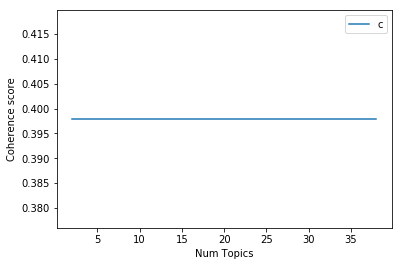

In [77]:
# Show graph

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [78]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3979
Num Topics = 8  has Coherence Value of 0.3979
Num Topics = 14  has Coherence Value of 0.3979
Num Topics = 20  has Coherence Value of 0.3979
Num Topics = 26  has Coherence Value of 0.3979
Num Topics = 32  has Coherence Value of 0.3979
Num Topics = 38  has Coherence Value of 0.3979


In [79]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -3.899045837400358

Coherence Score:  0.39787245672867966


In [80]:
# Now get about showing the topic weights for each image
# We do this by finding the topic number that has the highest contribution to the text of that image
def document_weights_per_topic(ldamodel=lda_model, corpus=bow_corpus, texts=df_logistic.Post_Description):
    # Init output
    topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                topic_list = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in topic_list])
                topics_df = topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    topics_df = pd.concat([topics_df, contents], axis=1)
    return(topics_df)


df_topic_keywords = document_weights_per_topic(ldamodel=lda_model, corpus=bow_corpus, texts=df_logistic.Post_Description)

# Format
df_dominant_topic = df_topic_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

# Set to a result file
df_dominant_topic.to_csv('dominant_topic_results.csv', encoding='utf-8')

In [81]:
# Take the highest and lowest quartiles of the pictures
# first we get the 1st and 3rd quartile
df_logistic.eng_score.quantile([0.25,0.75])

0.25    0.058990
0.75    0.131525
Name: eng_score, dtype: float64

In [82]:
# Now we split based on this information
data_1st = df_logistic[df_logistic['eng_score'] < 0.12121]
data_3rd = df_logistic[df_logistic['eng_score'] >= 0.25414]

In [83]:
# Run the weight function below for the 1st and 3rd quartile, then get the average of the weights
df_topic_keywords_1stQ = document_weights_per_topic(ldamodel=lda_model, corpus=bow_corpus, texts=df_logistic.Post_Description)
df_topic_keywords_3rdQ = document_weights_per_topic(ldamodel=lda_model, corpus=bow_corpus, texts=df_logistic.Post_Description)

# Format
df_dominant_topic_1 = df_topic_keywords_1stQ.reset_index()
df_dominant_topic_3 = df_topic_keywords_3rdQ.reset_index()
df_dominant_topic_1.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic_3.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [84]:
# Drop NaN so that the 1st and 3rd quartiles remain
df_dominant_topic_1 = df_dominant_topic_1.dropna()
df_dominant_topic_1.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.7966,"water, natur, tree, wildlif, mammal, ocean, pl...",the water creates a surreal color landscape a...
1,1,3.0,0.7290,"water, natur, tree, wildlif, mammal, ocean, pl...",after completing a photographic assignment at...
2,2,3.0,0.7978,"water, natur, tree, wildlif, mammal, ocean, pl...",how to meet a living legend? first learn ever...
3,3,3.0,0.8367,"water, natur, tree, wildlif, mammal, ocean, pl...",i met this lisu man as he gathered gifts of t...
4,4,1.0,0.8853,"fauna, wildlif, photographi, water, organ, mam...","golden eagle chick, cairngorm national park, ..."


In [85]:
df_dominant_topic_3 = df_dominant_topic_3.dropna()
df_dominant_topic_3.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.7966,"water, natur, tree, wildlif, mammal, ocean, pl...",the water creates a surreal color landscape a...
1,1,3.0,0.7290,"water, natur, tree, wildlif, mammal, ocean, pl...",after completing a photographic assignment at...
2,2,3.0,0.7977,"water, natur, tree, wildlif, mammal, ocean, pl...",how to meet a living legend? first learn ever...
3,3,3.0,0.8368,"water, natur, tree, wildlif, mammal, ocean, pl...",i met this lisu man as he gathered gifts of t...
4,4,1.0,0.8853,"fauna, wildlif, photographi, water, organ, mam...","golden eagle chick, cairngorm national park, ..."


In [86]:
Q1_tot_weights = {'0.0': 0, '1.0': 0, '2.0': 0, '3.0': 0, '4.0': 0}
Q1_tot_iter = {'0.0': 0, '1.0': 0, '2.0': 0, '3.0': 0, '4.0': 0}


counter = 0

while counter < df_dominant_topic_1.shape[0]:
    top_num_str = str(df_dominant_topic_1['Dominant_Topic'].iloc[counter])
    print(top_num_str)
    if top_num_str in Q1_tot_weights:
        Q1_tot_weights[top_num_str] += df_dominant_topic_1['Topic_Perc_Contrib'].iloc[counter]
        Q1_tot_iter[top_num_str] += 1
        counter += 1
    else:
        print("Error incrementing values")
        counter += 1

Q1_average = dict()
for key in Q1_tot_weights:
    if key in Q1_tot_iter:
        Q1_average[key] = Q1_tot_weights[key]/Q1_tot_iter[key]
        
Q1_average

3.0
3.0
3.0
3.0
1.0
0.0
2.0
3.0
0.0
3.0
0.0
0.0
1.0
2.0
1.0
4.0
1.0
4.0
0.0
3.0
2.0
2.0
3.0
0.0
1.0
3.0
1.0
3.0
2.0
2.0
2.0
4.0
2.0
0.0
4.0
2.0
0.0
0.0
1.0
1.0
4.0
0.0
4.0
4.0
0.0
1.0
3.0
2.0
4.0
0.0
1.0
3.0
0.0
0.0
1.0
1.0
1.0
2.0
0.0
2.0
0.0
0.0
3.0
1.0
3.0
1.0
1.0
4.0
3.0
0.0
1.0
0.0
1.0
2.0
1.0
4.0
3.0
1.0
1.0
3.0
3.0
3.0
3.0
4.0
4.0
0.0
0.0
3.0
1.0
1.0
0.0
2.0
1.0
3.0
1.0
0.0
2.0
0.0
4.0
3.0
1.0
0.0
1.0
0.0
0.0
4.0
2.0
3.0
4.0
3.0
1.0
1.0
4.0
0.0
0.0
0.0
2.0
3.0
1.0
0.0
3.0
4.0
0.0
2.0
3.0
3.0
3.0
3.0
3.0
1.0
4.0
1.0
3.0
4.0
2.0
1.0
2.0
0.0
3.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
3.0
2.0
2.0
2.0
2.0
0.0
3.0
0.0
4.0
4.0
2.0
1.0
2.0
1.0
4.0
2.0
0.0
0.0
2.0
3.0
3.0
1.0
3.0
0.0
1.0
1.0
3.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
2.0
4.0
3.0
3.0
3.0
1.0
1.0
1.0
0.0
4.0
0.0
0.0
0.0
4.0
2.0
0.0
0.0
1.0
4.0
1.0
0.0
2.0
2.0
3.0
1.0
0.0
1.0
1.0
1.0
1.0
4.0
0.0
0.0
1.0
2.0
1.0
1.0
0.0
3.0
1.0
1.0
1.0
3.0
3.0
1.0
3.0
1.0
3.0
0.0
4.0
0.0
1.0
3.0
0.0
2.0
3.0
3.0
2.0
0.0
2.0
3.0
1.0
0.0
0.0
1.0


{'0.0': 0.5391701160148642,
 '1.0': 0.760700006117212,
 '2.0': 0.7663254559040069,
 '3.0': 0.7935479409890632,
 '4.0': 0.7595049977302551}

In [87]:
Q3_tot_weights = {'0.0': 0, '1.0': 0, '2.0': 0, '3.0': 0, '4.0': 0}
Q3_tot_iter = {'0.0': 0, '1.0': 0, '2.0': 0, '3.0': 0, '4.0': 0}

counter = 0

while counter < df_dominant_topic_3.shape[0]:
    top_num_str = str(df_dominant_topic_3['Dominant_Topic'].iloc[counter])
    print(top_num_str)
    if top_num_str in Q3_tot_weights:
        Q3_tot_weights[top_num_str] += df_dominant_topic_3['Topic_Perc_Contrib'].iloc[counter]
        Q3_tot_iter[top_num_str] += 1
        counter += 1
    else:
        print("Error incrementing values")
        counter += 1

Q3_average = dict()
for key in Q3_tot_weights:
    if key in Q3_tot_iter:
        Q3_average[key] = Q3_tot_weights[key]/Q3_tot_iter[key]
        
Q3_average

3.0
3.0
3.0
3.0
1.0
0.0
2.0
3.0
0.0
3.0
0.0
0.0
1.0
2.0
1.0
4.0
1.0
4.0
0.0
3.0
2.0
2.0
3.0
0.0
1.0
3.0
1.0
3.0
2.0
2.0
2.0
4.0
2.0
0.0
4.0
2.0
0.0
0.0
1.0
1.0
4.0
0.0
4.0
4.0
0.0
1.0
3.0
2.0
4.0
0.0
1.0
3.0
0.0
0.0
1.0
1.0
1.0
2.0
0.0
2.0
0.0
0.0
3.0
1.0
3.0
1.0
1.0
4.0
3.0
0.0
1.0
0.0
1.0
2.0
1.0
4.0
3.0
1.0
1.0
3.0
3.0
3.0
3.0
1.0
4.0
0.0
0.0
3.0
1.0
1.0
0.0
2.0
1.0
3.0
1.0
0.0
2.0
0.0
4.0
3.0
1.0
0.0
1.0
0.0
0.0
4.0
2.0
3.0
4.0
3.0
1.0
1.0
4.0
0.0
0.0
0.0
2.0
3.0
1.0
0.0
3.0
4.0
0.0
2.0
3.0
3.0
3.0
3.0
3.0
1.0
4.0
1.0
3.0
4.0
2.0
1.0
2.0
0.0
3.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
3.0
2.0
2.0
2.0
2.0
0.0
3.0
0.0
4.0
4.0
2.0
1.0
2.0
1.0
4.0
2.0
0.0
0.0
2.0
3.0
3.0
1.0
3.0
0.0
1.0
1.0
3.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
2.0
4.0
3.0
3.0
3.0
1.0
1.0
1.0
0.0
4.0
0.0
0.0
0.0
4.0
2.0
0.0
0.0
1.0
4.0
1.0
0.0
2.0
2.0
3.0
1.0
0.0
1.0
1.0
1.0
1.0
4.0
0.0
0.0
1.0
2.0
1.0
1.0
0.0
3.0
1.0
1.0
1.0
3.0
3.0
1.0
3.0
1.0
3.0
0.0
4.0
0.0
1.0
3.0
0.0
2.0
3.0
3.0
2.0
0.0
2.0
3.0
1.0
0.0
0.0
1.0


{'0.0': 0.5360395359091981,
 '1.0': 0.7574819205923283,
 '2.0': 0.764576787927321,
 '3.0': 0.7926351323321059,
 '4.0': 0.7666769172900763}

In [88]:
Q1_average_df = pd.DataFrame.from_dict(Q1_average, orient='index', columns = ['Average Q1'])
Q3_average_df = pd.DataFrame.from_dict(Q3_average, orient='index', columns = ['Average Q3'])

In [89]:
Q1_average_df

,Average Q1
0.0,0.539170
1.0,0.760700
2.0,0.766325
3.0,0.793548
4.0,0.759505


In [90]:
Q3_average_df

,Average Q3
0.0,0.536040
1.0,0.757482
2.0,0.764577
3.0,0.792635
4.0,0.766677


## We can conclude that top most engaging topics were Wildlife, Aquatic, Ecosystem, Night View and Hilly area which garnered most likes & comments.

We would like to recommend Nat geographic Manager to post more images pertaining to Aquatic or nature as they are expected to engage the viewers more often than not.

The high engagement score in the dataset stamps more authority to the findings.

The surprising fact was that no images pertaining to space gathered high engagement score which was a bit shocking, Nonetheless as expected images which had marine life or mountains or secluded areas had high engagement score.
